# Code to simulate and visualise 1D system of Delta Hes
Based on these equations: 

$$\frac{dH_i}{dt} = \beta_H m_{h,i}(t-T_p) - \gamma_H H_i(t)$$

$$\frac{dm_{H,i}}{dt} = \beta_m(w_H \frac{p_H^l}{p_H^l + H_i(t-T_m)^l} + w_D \frac{<D(t-T_m)>_i^n}{p_D^n + <D(t-T_m)>_i^n}) - \gamma_m m_{H,i}(t)$$

$$\frac{dD_i}{dt} = \beta_D m_{D,i}(t-T_p) - \gamma_D D_i(t)$$

$$\frac{dm_{D,i}}{dt} = \beta_m \frac{p_H^l}{p_H^l + H_i(t-T_m)^l} - \gamma_m m_{H,i}(t)$$


This gave me the following non-dimensionalised equations: 

$$\frac{d h_i}{dt} = m_{h,i}(t) - \gamma_hh_i(t)$$

$$\frac{dm_{h,i}}{dt} = w_H \frac{p_h^l}{p_h^l + h_i(t-\tau_h)^l} + w_D \frac{<d(t-\tau_d)>_i^n}{p_d^n+ <d(t-\tau_d)>_i^n}) - \gamma_m m_{h,i}(t)$$
    
$$\frac{d d_i}{dt} =  m_{d,i}(t) - \gamma_dd_i(t)$$

$$\frac{dm_{d,i}}{dt} = \frac{p_h^l}{p_h^l + h_i(t-\tau_h)^l} -\gamma_m m_{h,i}(t)$$

In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
from IPython.display import HTML
from tqdm import tqdm
from scipy.signal import find_peaks
import pickle

import visualisation as vis
from delta_hes_model import *
from analysis import *

plt.rcParams['text.usetex'] = True

hescolor1 = '#fdc776'  # light
hescolor2 = '#fc4e2a'  # dark
hescolor3 = '#8b1a0e'  # dark red with a warm tone

In [75]:
#set the lattice of the cells 
P = 40
Q = 1

lattice = get_lattice(P, Q)

# #set first cell to have no coupling with the rest of the cells
# lattice.connectivity[:,0] = np.zeros(P*Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 50
T_h = 20
T_coupling = 50
w_h = 1
w_coupling = 1
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = False, grad_coup = False, grad_hes_strength = 1, grad_coup_strength = 0)
print(params)

namespace(gamma_h=0.03, gamma_d=0.03, gamma_m=0.03, p_h=100, p_d=50, T_h=array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20.]), T_coupling=array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50.]), w_h=1, w_coupling=1, l=5, n=3, grad_hes=False, grad_coup=False, grad_hes_strength=1, grad_coup_strength=0)


# Run simulations

In [ ]:
epsilons = [0.08, 0.25]
tau_h = [0, 20]
results_checkerboard = np.zeros((len(epsilons), len(tau_h), num_tsteps, lattice.P, 4))

for epsilon in epsilons:
    for tau in tau_h:
        params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, tau, T_coupling, w_h, epsilon, l, n, lattice, grad_hes = False, grad_coup = False, grad_hes_strength = 1, grad_coup_strength = 0)
        h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='checkerboard', initial_val2=300)
        results_checkerboard[epsilons.index(epsilon), tau_h.index(tau), :, :, 0] = h.reshape(num_tsteps, lattice.P)
        results_checkerboard[epsilons.index(epsilon), tau_h.index(tau), :, :, 1] = m_h.reshape(num_tsteps, lattice.P)
        results_checkerboard[epsilons.index(epsilon), tau_h.index(tau), :, :, 2] = d.reshape(num_tsteps, lattice.P)
        results_checkerboard[epsilons.index(epsilon), tau_h.index(tau), :, :, 3] = m_d.reshape(num_tsteps, lattice.P)


100%|██████████| 19999/19999 [01:48<00:00, 184.63it/s]


In [ ]:
epsilons_uni = [0.08, 0.25, 0.5]
tau_h = [0, 20]
results_uniform = np.zeros((len(epsilons_uni), len(tau_h), num_tsteps, lattice.P, 4))

for epsilon in epsilons_uni:
    for tau in tau_h:
        params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, tau, T_coupling, w_h, epsilon, l, n, lattice, grad_hes = False, grad_coup = False, grad_hes_strength = 1, grad_coup_strength = 0)
        h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='uniform', initial_val2=300)
        results_uniform[epsilons_uni.index(epsilon), tau_h.index(tau), :, :, 0] = h.reshape(num_tsteps, lattice.P)
        results_uniform[epsilons_uni.index(epsilon), tau_h.index(tau), :, :, 1] = m_h.reshape(num_tsteps, lattice.P)
        results_uniform[epsilons_uni.index(epsilon), tau_h.index(tau), :, :, 2] = d.reshape(num_tsteps, lattice.P)
        results_uniform[epsilons_uni.index(epsilon), tau_h.index(tau), :, :, 3] = m_d.reshape(num_tsteps, lattice.P)

In [ ]:
epsilons_period = np.linspace(0, 1, 21)
results_uni_periods = np.zeros((len(epsilons_period), len(tau_h), num_tsteps, lattice.P, 4))

for i, epsilon in enumerate(epsilons_period):
    for j, tau in enumerate(tau_h):
        params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, tau, T_coupling, w_h, epsilon, l, n, lattice, grad_hes = False, grad_coup = False, grad_hes_strength = 1, grad_coup_strength = 0)
        h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='uniform', initial_val2=300)
        results_uni_periods[i,j, :, :, 0] = h.reshape(num_tsteps, lattice.P)
        results_uni_periods[i,j, :, :, 1] = m_h.reshape(num_tsteps, lattice.P)
        results_uni_periods[i,j,  :, :, 2] = d.reshape(num_tsteps, lattice.P)
        results_uni_periods[i,j,  :, :, 3] = m_d.reshape(num_tsteps, lattice.P)

In [ ]:
delays = np.linspace(0, 50, 11)
results_uni_delay = np.zeros((len(delays), len(tau_h), num_tsteps, lattice.P, 4))
epsilon_delay = 0.25

for i, T_coupling in enumerate(delays):
    for j, tau in enumerate(tau_h):
        params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, tau, T_coupling, w_h, epsilon_delay, l, n, lattice, grad_hes = False, grad_coup = False, grad_hes_strength = 1, grad_coup_strength = 0)
        h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='uniform', initial_val2=300)
        results_uni_delay[i,j, :, :, 0] = h.reshape(num_tsteps, lattice.P)
        results_uni_delay[i,j, :, :, 1] = m_h.reshape(num_tsteps, lattice.P)
        results_uni_delay[i,j, :, :, 2] = d.reshape(num_tsteps, lattice.P)
        results_uni_delay[i,j, :, :, 3] = m_d.reshape(num_tsteps, lattice.P)

# Load data

In [4]:
with open('results_uni_periods.pickle', 'rb') as f:
    results_uni_periods = pickle.load(f)

# two cell comparison for periods
comparison = np.load('comparison-two-cell.npz')

epsilons_comparison = comparison['epsilons']
periods_comparison = comparison['periods']

# Calculations

In [ ]:
# take middle cell of the results 
cell = 20 
signals = results_uni_periods[:, :, :, cell, 0].reshape(len(epsilons_period), len(tau_h), num_tsteps)
periods = np.zeros((len(epsilons_period), len(tau_h)))

for i in range(len(epsilons_period)):
    for j in range(len(tau_h)):
        period, peak_times = estimate_period_from_peaks(signals[i, j, :], time=np.arange(num_tsteps) * dt)
        periods[i,j] = period

# Plotting data

C:\Users\kbmcd\AppData\Local\Temp\ipykernel_25944\2627488222.py:211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


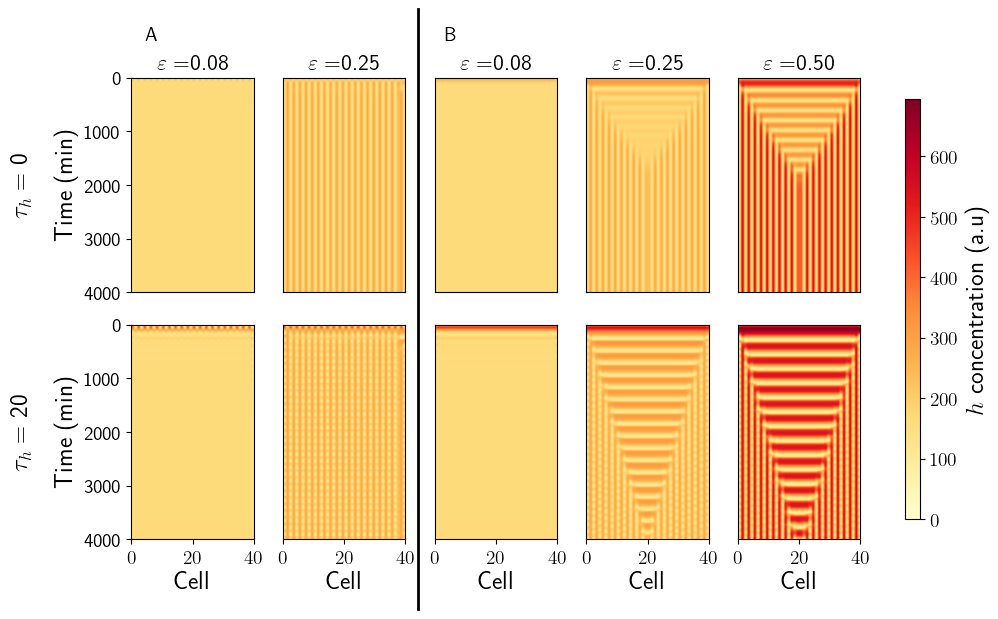

In [ ]:
all_data = []

# Checkerboard
for i in range(len(epsilons)):
    for j in range(len(tau_h)):
        data = results_checkerboard[i, j, :, :, k].reshape(num_tsteps, lattice.P)
        all_data.append(data)

# Uniform
for i in range(len(epsilons_uni)):
    for j in range(len(tau_h)):
        data = results_uniform[i, j, :, :, k].reshape(num_tsteps, lattice.P)
        all_data.append(data)

all_data = np.stack(all_data)
vmin_global = np.min(all_data)
vmax_global = np.ceil(np.max(all_data))

# -------------------------
# Create figure and axes grid
# -------------------------

fig, axs = plt.subplots(
    nrows=2,
    ncols=5,
    figsize=(10, 6),
    sharex=True,
    sharey=True
)

ims = []

# -------------------------
# Plot checkerboard (first 2 columns)
# -------------------------

for i in range(len(epsilons)):
    for j in range(len(tau_h)):
        ax = axs[j, i]
        data = results_checkerboard[i, j, :, :, k].reshape(num_tsteps, lattice.P)
        
        im = ax.imshow(
            data,
            aspect='auto',
            cmap='YlOrRd',
            vmin=vmin_global,
            vmax=vmax_global,
            extent=[0, lattice.P, 0, num_tsteps * dt]
        )
        ims.append(im)
        
        # y-axis ticks and label
        if i == 0:
            ax.set_ylabel('Time (min)', fontsize=18)
            ax.set_yticks(np.linspace(num_tsteps * dt, 0, 5))
            ax.tick_params(axis='y', labelsize=14)

            yticks = np.linspace(num_tsteps * dt, 0, 5)  # or however many ticks you want
            ax.set_yticks(yticks)
            ax.set_yticklabels([f"{int(y)}" for y in yticks[::-1]], fontsize=14)

            
        else:
            # ax.set_yticklabels([])
            ax.tick_params(axis='y', left=False)

        # x-axis ticks and label
        if j == len(tau_h) - 1:
            ax.set_xlabel('Cell', fontsize=18)
            # ax.set_xticks(np.linspace(0, lattice.P, 5))
            ax.tick_params(axis='x', labelsize=14)
        else:
            # ax.set_xticklabels([])
            ax.tick_params(axis='x', bottom=False)  

# -------------------------
# Plot uniform (next 3 columns)
# -------------------------

for i in range(len(epsilons_uni)):
    for j in range(len(tau_h)):
        ax = axs[j, i + 2]
        data = results_uniform[i, j, :, :, k].reshape(num_tsteps, lattice.P)
        
        im = ax.imshow(
            data,
            aspect='auto',
            cmap='YlOrRd',
            vmin=vmin_global,
            vmax=vmax_global,
            extent=[0, lattice.P, 0, num_tsteps * dt]
        )
        ims.append(im)
        
        # y-axis ticks and label
        if (i + 2) == 0:
            ax.set_ylabel('Time (min)', fontsize=18)
            ax.tick_params(axis='y', labelsize=14)
        else:
            # ax.set_yticklabels([])
            ax.tick_params(axis='y', left=False)

        # x-axis ticks and label
        if j == len(tau_h) - 1:
            ax.set_xlabel('Cell', fontsize=18)
            ax.tick_params(axis='x', labelsize=14)
        else:
            # ax.set_xticklabels([])
            ax.tick_params(axis='x', bottom=False)

# -------------------------
# Add single colorbar
# -------------------------

cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(ims[0], cax=cbar_ax)
cbar.set_label(r'$h$ concentration (a.u)', fontsize=18)
cbar.ax.tick_params(labelsize=14)

# -------------------------
# Add row labels
# -------------------------

for j in range(len(tau_h)):
    axs[j, 0].annotate(
        r'$\tau_h = $ ' + f'{tau_h[j]}',
        xy=(-0.9, 0.5),
        xycoords='axes fraction',
        ha='center',
        va='center',
        rotation=90,
        fontsize=18,
        weight='bold'
    )

# -------------------------
# Add column titles for epsilons
# -------------------------

# Titles for checkerboard columns
for i in range(len(epsilons)):
    axs[0, i].set_title(r'$\varepsilon=$' + f'{epsilons[i]:.2f}', fontsize=16)

# Titles for uniform columns
for i in range(len(epsilons_uni)):
    axs[0, i + 2].set_title(r'$\varepsilon=$' + f'{epsilons_uni[i]:.2f}', fontsize=16)

# -------------------------
# Add section labels A and B
# -------------------------

# Section A label in top-left of checkerboard block
fig.text(
    0.16,                # left side
    0.97,                # near top
    'A',
    ha='left',
    va='top',
    fontsize=14,
    weight='bold'
)

# # Section label "Checkerboard" in top-right of checkerboard block
# fig.text(
#     0.37,               # right edge of checkerboard block
#     0.97,
#     'Checkerboard',
#     ha='right',
#     va='top',
#     fontsize=12
# )

# Section B label in top-left of uniform block
fig.text(
    0.46,
    0.97,
    'B',
    ha='left',
    va='top',
    fontsize=14,
    weight='bold'
)

# # Section label "Uniform" in top-right of uniform block
# fig.text(
#     0.89,
#     0.97,
#     'Uniform',
#     ha='right',
#     va='top',
#     fontsize=12
# )


# -------------------------
# Draw vertical black line between checkerboard and uniform
# -------------------------

line = Line2D(
    [0.433, 0.433],
    [0, 1],
    color='k',
    linewidth=2,
    transform=fig.transFigure,
    clip_on=False
)
fig.add_artist(line)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.savefig('one-line-lat-inhib.png', dpi=300, bbox_inches='tight')
plt.show()

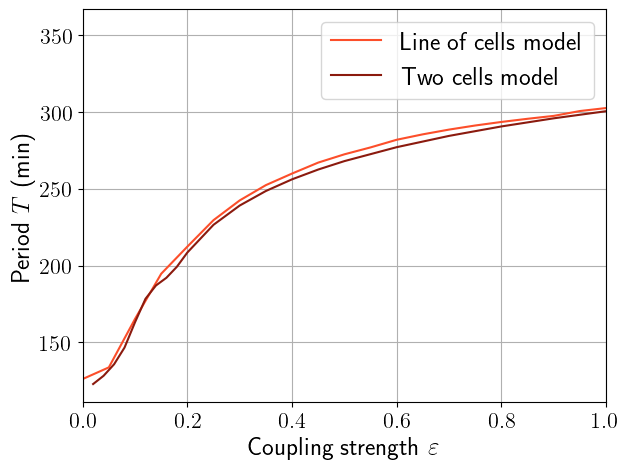

In [160]:
# plt.plot(epsilons_period, periods[:, 0], label='Tau_h = 0')
plt.plot(epsilons_period, periods[:, 1], label='Line of cells model', color = hescolor2)
plt.plot(epsilons_comparison, periods_comparison, label='Two cells model', color = hescolor3)
plt.xlim(0, 1)
plt.xlabel(r'Coupling strength $\varepsilon$', fontsize=18)
plt.ylabel(r'Period $T$ (min)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.savefig('one-line-periods-comparison.png', dpi=600, bbox_inches='tight')
plt.show()

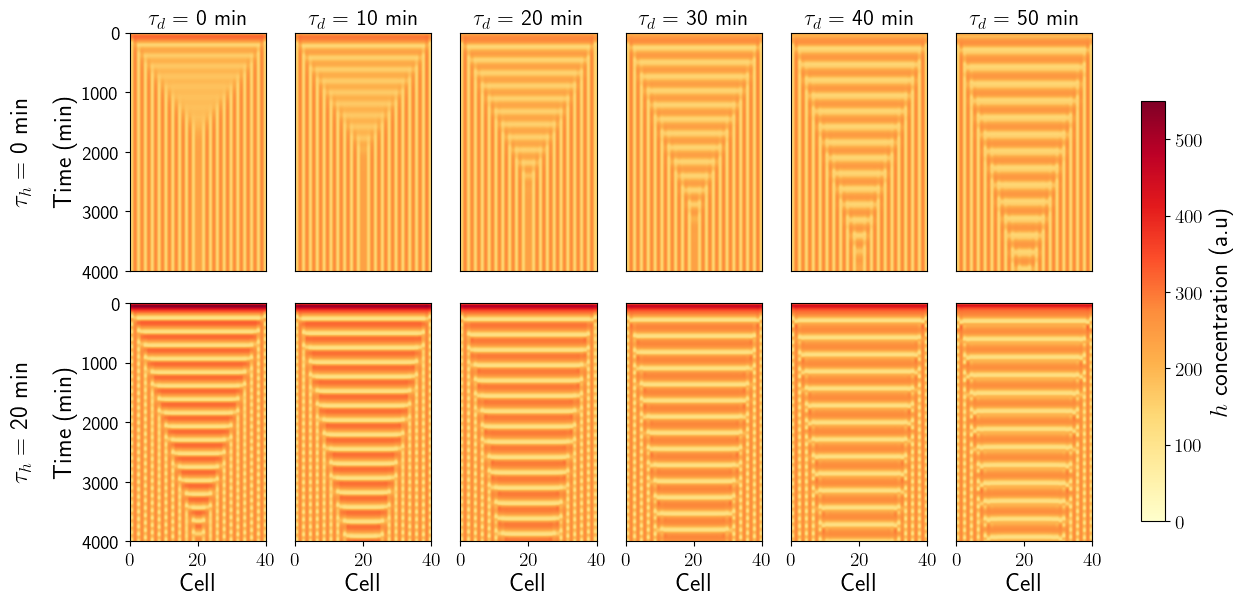

In [176]:


k = 0  # choose type of data to plot (0 for h, 1 for m_h, 2 for d, 3 for m_d)

# -------------------------
# Select subset of delays
# -------------------------

selected_indices = np.arange(0, len(delays), 2)
selected_delays = delays[selected_indices]

# -------------------------
# Calculate global vmin/vmax
# -------------------------

all_data = []
for i in selected_indices:
    for j in range(len(tau_h)):
        data = results_uni_delay[i, j, :, :, k].reshape(num_tsteps, lattice.P)
        all_data.append(data)

all_data = np.stack(all_data)
vmin = np.min(all_data)
vmax = np.ceil(np.max(all_data))

# -------------------------
# Create figure and axes
# -------------------------

ncols = len(selected_indices)
nrows = len(tau_h)

fig, axs = plt.subplots(
    nrows,
    ncols,
    figsize=(2 * ncols, 3 * nrows),
    sharex=True,
    sharey=True
)

# Ensure axs is always 2D
if nrows == 1 and ncols == 1:
    axs = np.array([[axs]])
elif nrows == 1:
    axs = axs[np.newaxis, :]
elif ncols == 1:
    axs = axs[:, np.newaxis]

# -------------------------
# Plot each subplot
# -------------------------

for plot_idx, i in enumerate(selected_indices):
    for j in range(len(tau_h)):
        ax = axs[j, plot_idx]

        data = results_uni_delay[i, j, :, :, k].reshape(num_tsteps, lattice.P)

        im = ax.imshow(
            data,
            aspect='auto',
            cmap='YlOrRd',
            vmin=vmin,
            vmax=vmax,
            extent=[0, lattice.P, 0, num_tsteps * dt]
        )

        # y-axis ticks and label
        if plot_idx == 0:
            ax.set_ylabel('Time (min)', fontsize=18)
            yticks = np.linspace(num_tsteps * dt, 0, 5)
            ax.set_yticks(yticks)
            ax.set_yticklabels([f"{int(y)}" for y in yticks[::-1]], fontsize=14)
            ax.tick_params(axis='y', labelsize=14)
        else:
            ax.tick_params(axis='y', left=False)

        # x-axis ticks and label
        if j == len(tau_h) - 1:
            ax.set_xlabel('Cell', fontsize=18)
            ax.tick_params(axis='x', labelsize=14)
        else:
            ax.tick_params(axis='x', bottom=False)

# -------------------------
# Adjust layout
# -------------------------

plt.tight_layout(rect=[0, 0, 0.9, 1])

# -------------------------
# Add colorbar
# -------------------------

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$h$ concentration (a.u)', fontsize=18)
cbar.ax.tick_params(labelsize=14)

# -------------------------
# Add row annotations
# -------------------------

for j in range(len(tau_h)):
    axs[j, 0].annotate(
        r'$\tau_h = $ ' + f'{tau_h[j]}' + ' min',
        xy=(-0.8, 0.5),
        xycoords='axes fraction',
        ha='center',
        va='center',
        rotation=90,
        fontsize=18,
        weight='bold'
    )

# -------------------------
# Add column titles
# -------------------------

for plot_idx, i in enumerate(selected_indices):
    axs[0, plot_idx].set_title(
        r'$\tau_d =$ ' + f'{delays[i]:.0f}' + ' min',
        fontsize=16)
# plt.savefig('one-line-delay.png', dpi=600, bbox_inches='tight')
plt.show()
